# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Steps in Data Exploration and Preprocessing:
Identification of variables and data types
Analyzing the basic metrics
Non-Graphical Univariate Analysis
Graphical Univariate Analysis
Bivariate Analysis
Variable transformations
Missing value treatment
Outlier treatment
Correlation Analysis
Dimensionality Reduction

In [3]:
df=pd.read_csv("titanic-train.csv")

# To Know the info of data set

In [6]:
df.info() # it will give the column name, data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.shape  # it will give how many rows and columns in the data set

(891, 12)

# to describe

In [38]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.isnull().sum() # Will show you null count for each column, but will not count Zeros(0) as null


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
df.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# To get the list & number of unique values:
The nunique() function in Pandas returns a series with a number of distinct observations in a column.

In [25]:
# get the list of unique values.

df['Cabin'].nunique()

147

In [26]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [27]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Filtering based on Conditions:
"""Dataset can be filtered using different conditions, 
which can be implemented with the use of logical operators in python. For example, == (double equal to), ≤ (less than or equal to), ≥(greater than or equal to) etc
Let’s apply the same to our dataset and filter out the column which has the Employment.Type as “Salaried” ."""

In [28]:
df[(df['Embarked'] == "S")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [36]:
df[(df['Embarked'] == "Q") & (df['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q


# Graphical Univariate Analysis:
Histogram:
Histograms are one of the most common graphs used to display numeric data. Histograms two important things we can learn from a histogram:
distribution of the data — Whether the data is normally distributed or if it’s skewed (to the left or right)
To identify outliers — Extremely low or high values that do not fall near any other data points.

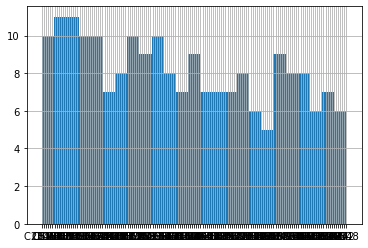

In [41]:
df['Cabin'].hist(bins=25) # histogram for cABIN

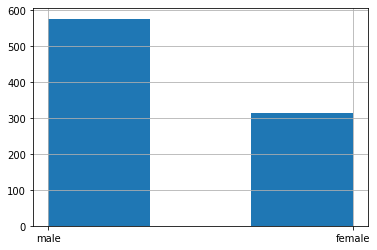

In [49]:
df['Sex'].hist(bins=3)

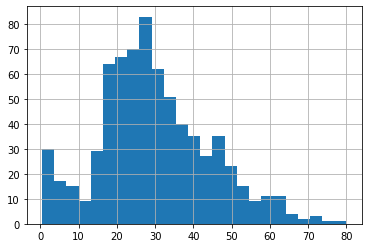

In [52]:

df['Age'].hist(bins=25)

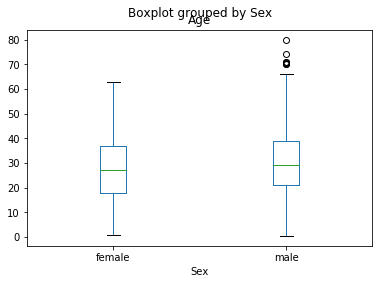

In [58]:
df.boxplot(by ='Sex', column =['Age'], grid = False)   # box plot based on age and sex

AxesSubplot(0.125,0.125;0.775x0.755)


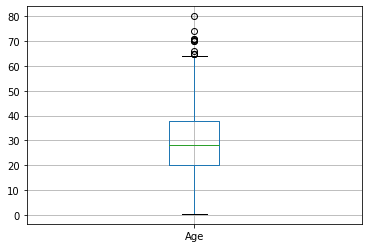

In [60]:
print(df.boxplot(column='Age'))

In [ ]:
# Count Plots

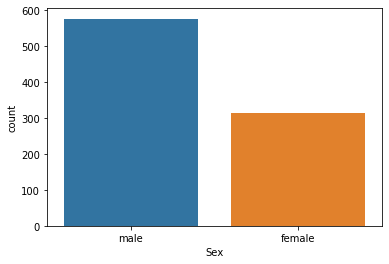

In [61]:
sns.countplot(df.Sex)

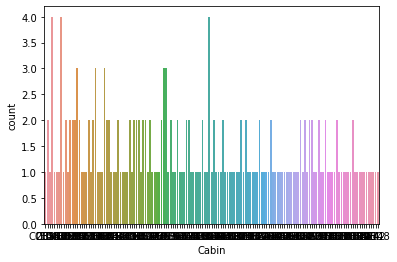

In [62]:
sns.countplot(df.Cabin)

In [ ]:
# The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary:
Minimum
First quartile
Median
Third quartile
Maximum.

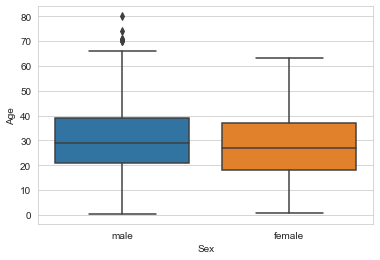

In [70]:
# Draw a vertical boxplot grouped 
# by a categorical variable: 
sns.set_style("whitegrid") 

sns.boxplot(x = 'Sex', y = 'Age', data =df) 


In [ ]:
"""Let’s take the first box plot i.e, blue box plot of the figure and understand these statistical things:
Bottom black horizontal line of blue box plot is minimum value
First black horizontal line of rectangle shape of blue box plot is First quartile or 25%
Second black horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median.
Third black horizontal line of rectangle shape of blue box plot is third quartile or 75%
Top black horizontal line of rectangle shape of blue box plot is maximum value.
Small diamond shape of blue box plot is outlier data or erroneous data."""


Text(0.5, 1.0, 'Ticket')

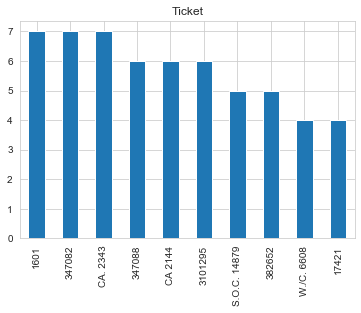

In [72]:
# Bar charts for tickets
df.Ticket.value_counts().head(10).plot.bar()
plt.title("Ticket")

Text(0.5, 1.0, 'Years group having max sale/registration')

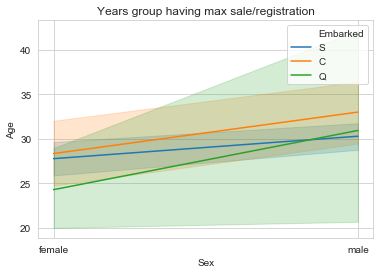

In [75]:
sns.lineplot(data=df, x='Sex', y='Age', hue='Embarked')
#sns.scatterplot(data=df, x='year', y='RegCounts', hue='registration')
plt.title("Years group having max sale/registration")

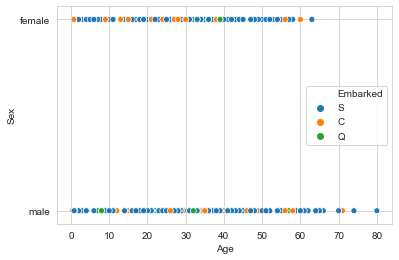

In [84]:
sns.scatterplot(data=df, x='Age', y='Sex', hue='Embarked')

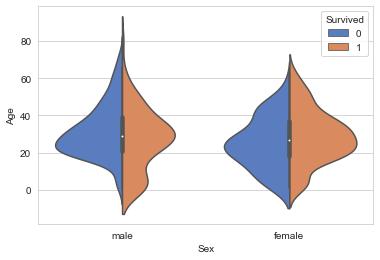

In [85]:
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, palette="muted", split=True)